In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
sent = np.load("en.1.npz")
T_proj = sent['projection_tensor']
source_langs = sent['source_languages']

In [29]:
T_proj[:,:,0].shape

(11, 12)

In [30]:
D = pd.DataFrame(T_proj[0])
M = T_proj[0] - T_proj[0].min()
M

array([[ 0.25611306,  0.25819969,  0.25956949,  0.18083921,  0.25725792,
         0.24800467,  0.25511393,  0.0007845 ,  0.25911977,  0.        ,
         0.26232518,  0.0095987 ,  0.24482927,  0.26194376,  0.25747055,
         0.2343909 ,  0.13057775,  0.01602444,  0.26178023,  0.19050885],
       [ 0.25611306,  0.25819969,  0.25956949,  0.18083921,  0.25725792,
         0.24800467,  0.25511393,  0.0007845 ,  0.25911977,  0.        ,
         0.26232518,  0.0095987 ,  0.24482927,  0.26194376,  0.25747055,
         0.2343909 ,  0.13057775,  0.01602444,  0.26178023,  0.19050885],
       [ 0.25611306,  0.25819969,  0.25956949,  0.18083921,  0.25725792,
         0.24800467,  0.25511393,  0.0007845 ,  0.25911977,  0.        ,
         0.26232518,  0.0095987 ,  0.24482927,  0.26194376,  0.25747055,
         0.2343909 ,  0.49430603,  0.01602444,  0.26178023,  0.19050885],
       [ 0.74537664,  0.74954991,  0.75228952,  0.59482895,  0.74766638,
         0.24800467,  0.74337839,  0.16123956,  

de


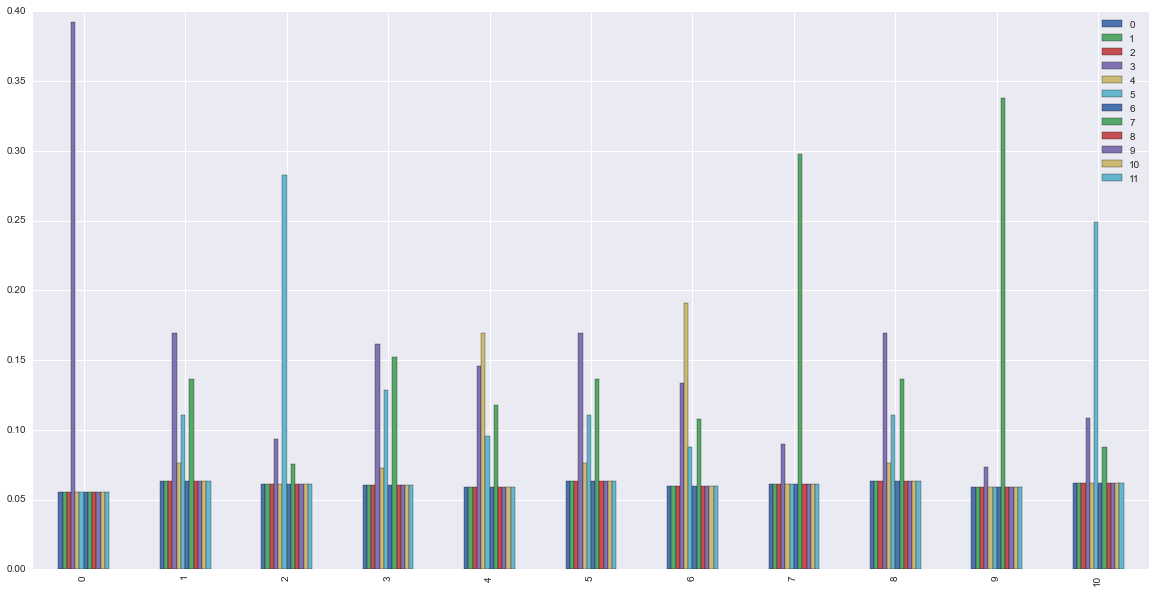

In [43]:
i = 4
print(source_langs[i])
M = T_proj[:,:,i]# - T_proj[:,:,i].min()

def softmax(matrix, temperature=1):
    m_exp = np.exp(matrix/temperature)
    return (m_exp.T / m_exp.sum(axis=1)).T

#for i in range(T_proj.shape[2]):
#    T_proj[:,:,i] = softmax(T_proj[:,:,i], 0.5)

#pd.DataFrame(softmax(M, 0.5)).plot(kind='bar', figsize=(20, 10))

# M -= M.min(axis=1)

#pd.DataFrame(M) *1

#for i in range(T_proj.shape[2]):
#    T_proj[:,:,i] = (T_proj[:,:,i].T * T_proj[:,:,i].sum(axis=1)).T

def sum_normalize(T_proj):
    return T_proj.sum(axis=2)

def row_normalize(M):
    return (M.T / M.sum(axis=1)).T

#M_voted = sum_normalize(T_proj)
#M_voted
M_norm = sum_normalize(T_proj)
pd.DataFrame(softmax(M, 0.25)).plot(kind='bar', figsize=(20, 10))
